In [1]:
using Plots
using DataFrames
using CSV

# Num Start Samps vs Best Y 

In [59]:
function best_y(n)
    dp_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/bayesdata/halton_$n.csv"
    dp_data = DataFrame(CSV.File(dp_path))
    X = Matrix(dp_data)
    y = X[54, :];
    prior_best = minimum(y[1:n])
    l = length(y[n+1:end]) - 1 
    post_best = [min(prior_best, minimum(y[n+1:n+1+i])) for i =1:l]
    best_ys = vcat([prior_best], post_best )
    return best_ys
end

best_y (generic function with 1 method)

In [42]:
ns = [5, 10, 25, 50, 90]

5-element Vector{Int64}:
  5
 10
 25
 50
 90

In [60]:
byns = zeros(15, 5)
for (ix, n) in enumerate(ns)
    print(n)
    byns[:, ix] = best_y(n)
end
byns

510255090

15×5 Matrix{Float64}:
 3.9604    2.96167   1.44643   0.656895  0.409785
 3.14989   1.05074   1.12645   0.656895  0.409785
 1.87296   0.556685  0.690922  0.656895  0.409785
 0.551958  0.556685  0.522496  0.521252  0.409785
 0.551958  0.556685  0.522496  0.521252  0.409785
 0.551958  0.556685  0.522496  0.521252  0.409785
 0.551958  0.556685  0.522496  0.521252  0.409785
 0.551958  0.556685  0.522496  0.521252  0.409785
 0.551958  0.556685  0.522496  0.521252  0.409785
 0.551958  0.556685  0.484652  0.521252  0.409785
 0.551958  0.556685  0.484652  0.416099  0.409785
 0.551958  0.556685  0.484652  0.416099  0.409785
 0.551958  0.556685  0.484652  0.416099  0.409785
 0.551958  0.556685  0.484652  0.416099  0.409785
 0.551958  0.556685  0.484652  0.416099  0.409785

In [64]:
fig_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/figures"

"/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/figures"

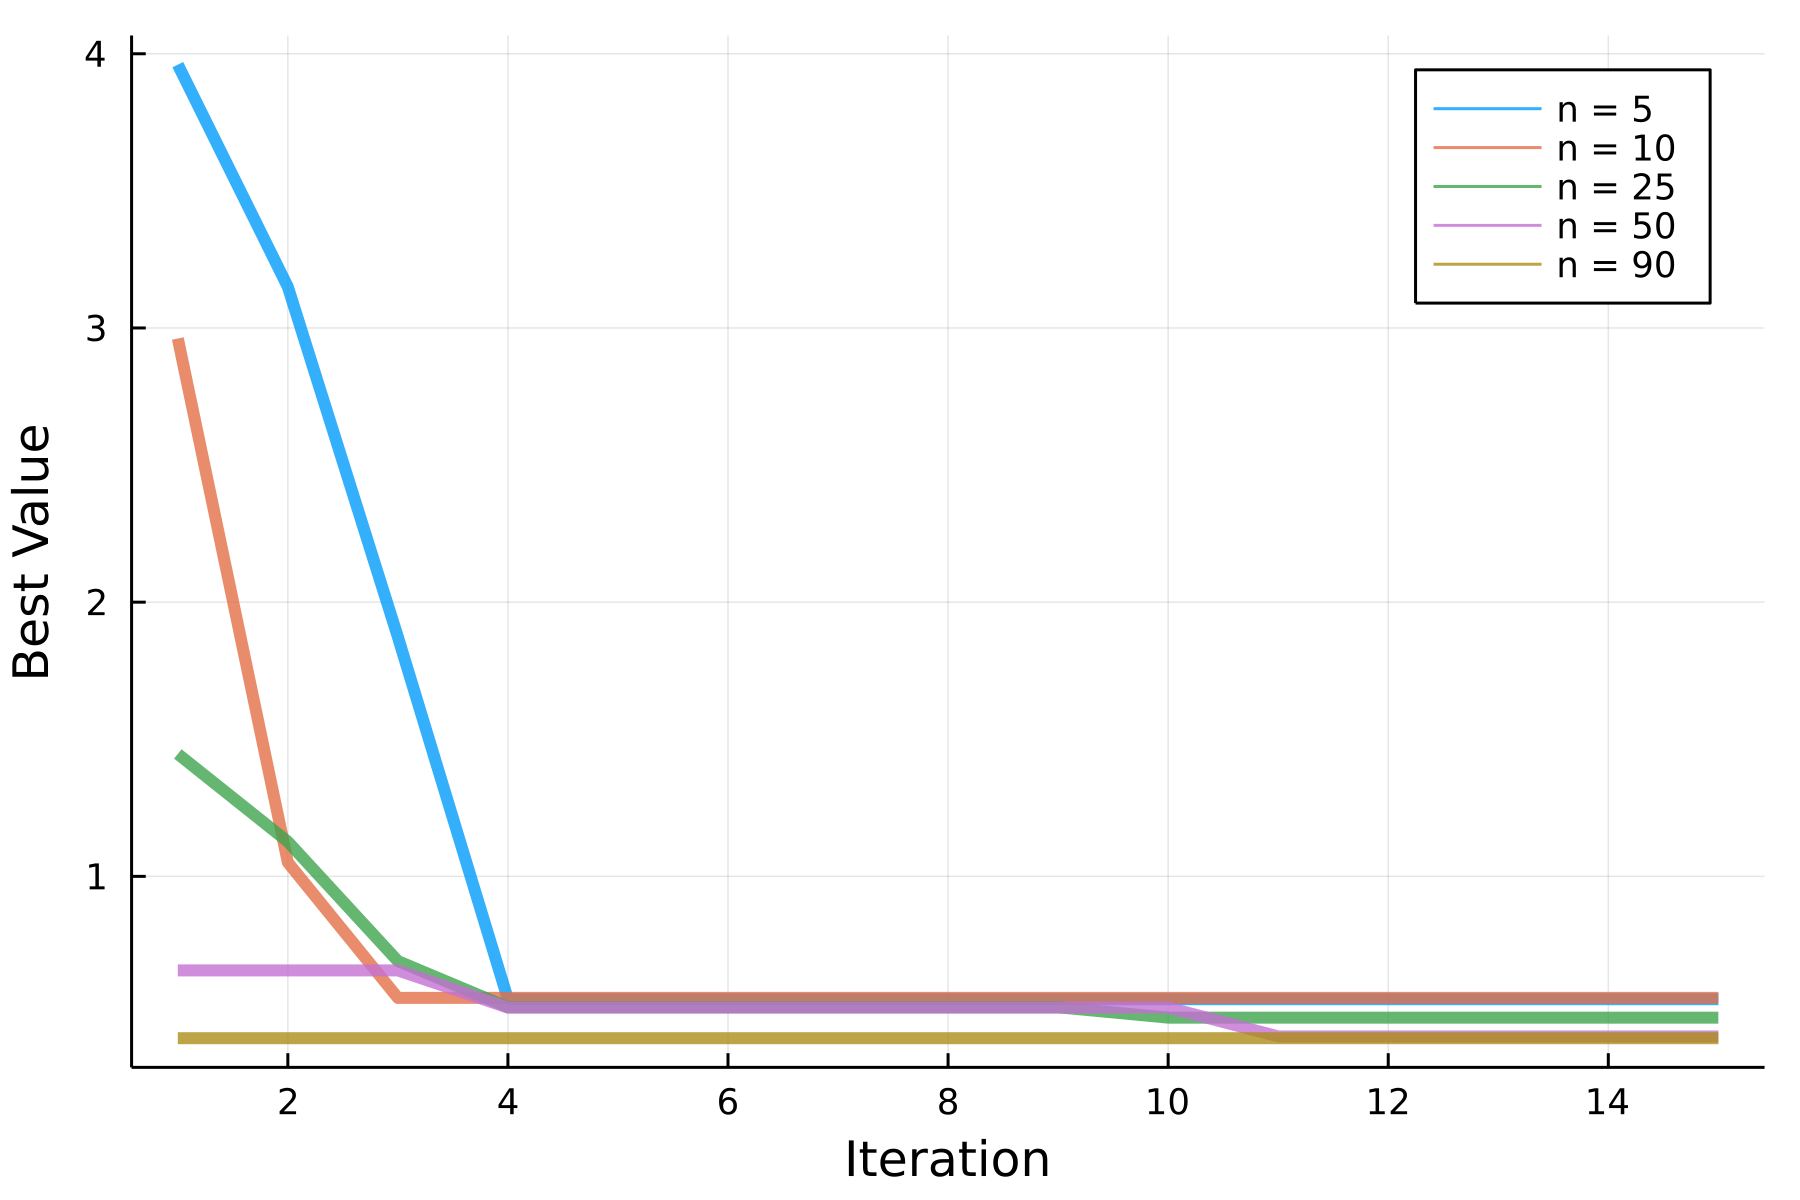

In [77]:
plot()
for (ix, n) in enumerate(ns)
    plot!(byns[:, ix], label = "n = $n", linewidth=4, linealpha=0.8, dpi=300)
end
plot!(xlabel="Iteration", ylabel="Best Value")



In [78]:
savefig("$fig_path/bayes_val_iter.png")

## More Data on Improvement Bayes

In [83]:
worst = byns[1, :]
best = byns[15, :]
println(" $best \n $worst \n $(worst./ best) ")

 [0.551958302147674, 0.5566849952889491, 0.4846519532316903, 0.41609858241083525, 0.4097845561555082] 
 [3.9604022332314317, 2.9616697860030516, 1.4464338091472175, 0.6568948724965351, 0.4097845561555082] 
 [7.1751837372886245, 5.320189714231093, 2.9844794795570393, 1.5787000971994407, 1.0] 


# Typical Bayes Chart, n = 25

In [1]:
include("/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/bayesfx.jl")

update_priors (generic function with 1 method)

In [55]:
n25 = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/bayesdata/halton_25.csv"
n25_df = DataFrame(CSV.File(n25))
n25data = Matrix(n25_df);

In [3]:
Xa = mapreduce(permutedims, vcat, get_filling_set_halton(450, 53))';

In [16]:
function gp_graph(ix, Xa, n=25)
    n25Xo = n25data[1:53, 1:n+ix]
    n25yo = n25data[54, 1:n+ix];
    gp, mll = create_gp(n25Xo, n25yo)
    μ, Σ = predict_y(gp,Xa);

    # gp predictions
    plotx = Xa[1,:]
    px = sortperm(plotx);
    a = plot(plotx[px],μ[px],ribbon=Σ[px], title="Iteration $ix",label="95% CI", )

    # gp observations
    plotxo = n25Xo[1,:]
    pxo = sortperm(plotxo);
    scatter!(a, plotx[pxo],n25yo[pxo],label="Observations", legend=:none)

    return a, gp, n25yo, n25Xo, plotx, px
end

    

gp_graph (generic function with 2 methods)

In [36]:
function eip_graph(gp, n25yo, n25Xo, plotx, px, ix)
    # expected improvement graph 
    dp, e_best, e = expected_improvement_graph(gp, n25yo, n25Xo, Xa);
    b = plot(plotx[px], e[px], linecolor=:red)
    scatter!(b, [dp[1][1]], [e[e_best]], markercolor=:red, legend=:none, title="$ix")
    return b
    
end

eip_graph (generic function with 3 methods)

In [52]:
function graphs(ix, n)
    a, gp, n25yo, n25Xo, plotx, px = gp_graph(ix, Xa, n);
    b = eip_graph(gp, n25yo, n25Xo, plotx, px, ix)
    return a, b 
end

graphs (generic function with 2 methods)

In [72]:
n = 25
g01, g02 = graphs(0, n)
plot!(g01, ylabel="Predicted RMSE")
plot!(g02, ylabel="Expected Improvement")
g11, g12 = graphs(1,n)
g21, g22 = graphs(2, n)
g31, g32 = graphs(3, n)
g91, g92 = graphs(9, n)

pre and post opt mll: -29.523211855256463, -2.624423109815691
pre and post opt mll: -31.70742913711112, -4.363535666336308
pre and post opt mll: -33.05323413891709, -5.375826991649159
pre and post opt mll: -34.14102731561283, -6.6966252018915675
pre and post opt mll: -42.81978631162933, -14.125292758165187


(Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2})

In [69]:
using Plots.PlotMeasures

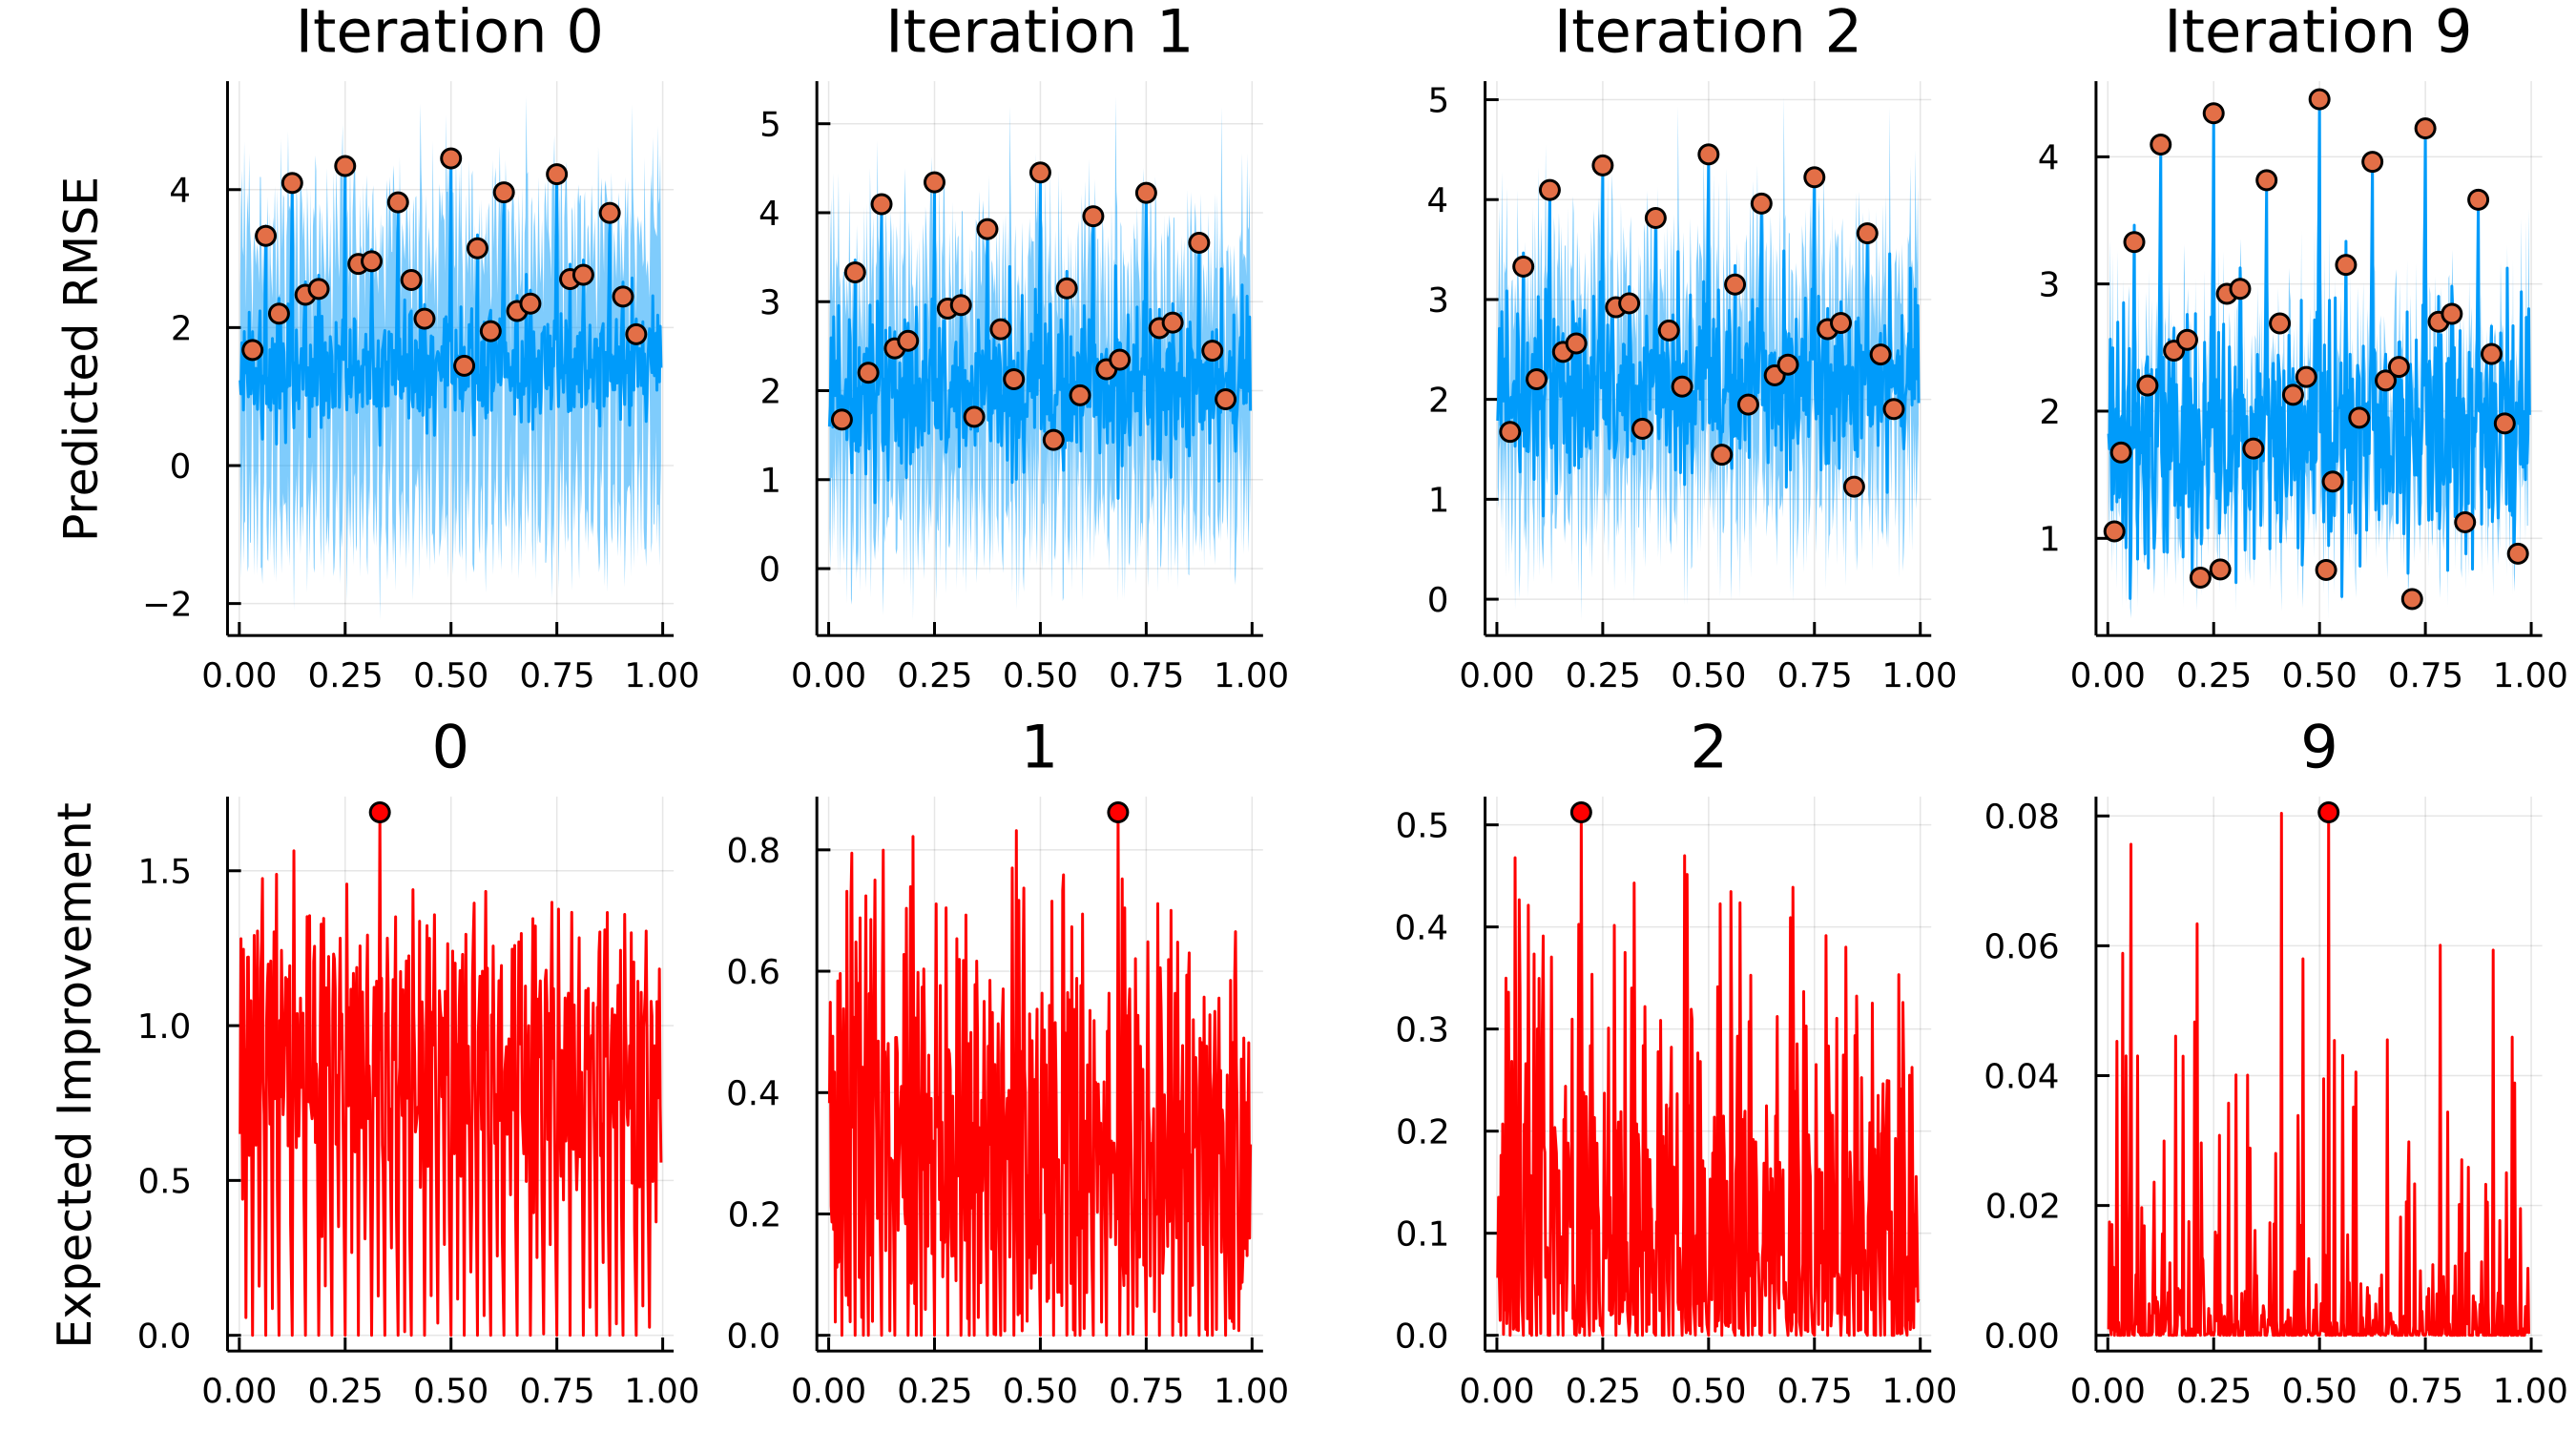

In [74]:
fig = plot(g01, g11, g21, g91,  g02, g12,  g22, g92, layout = (2,4), size=(900, 500), dpi=300, left_margin = [7mm 0mm])

In [65]:
savefig("$fig_path/bayes.png")